# loan eligibility prediction
### https://www.kaggle.com/vikasukani/loan-eligible-dataset

### loading data

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [134]:
train=pd.read_csv(r'E:\step to ML\DataSets\Loan eligibility for home\loan-train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
test=pd.read_csv(r'E:\step to ML\DataSets\Loan eligibility for home\loan-test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [136]:
train.shape

(614, 13)

In [137]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [138]:
len(train.columns)

13

In [139]:
test.shape

(367, 12)

In [140]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [142]:
def make_dataframe_for_nan(df):
    nan_features=[]
    nan_rows_feature=[]
    perc_nan_rows=[]
    rounded_perc_nan_rows=[]
    for feature in df.columns:
        if (df[feature].isnull().sum())>0:
            nan_rows=df[feature].isnull().sum()
            nan_rows_per=nan_rows/len(df)*100
            rounded_nan_rows_per=np.round(nan_rows_per)
            nan_features.append(feature)
            nan_rows_feature.append(nan_rows)
            perc_nan_rows.append(nan_rows_per)
            rounded_perc_nan_rows.append(rounded_nan_rows_per)
    nan= pd.DataFrame(list(zip(nan_features,nan_rows_feature,perc_nan_rows,rounded_perc_nan_rows)),columns =['feature Name','no of nan rows','percentage of nan rows','rounded percentage of nan rows'])
    nan.index = nan.index + 1
    return nan

In [143]:
nan_dataframe=make_dataframe_for_nan(train)
nan_dataframe

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
1,Gender,13,2.117264,2.0
2,Married,3,0.488599,0.0
3,Dependents,15,2.442997,2.0
4,Self_Employed,32,5.211726,5.0
5,LoanAmount,22,3.583062,4.0
6,Loan_Amount_Term,14,2.280130,2.0
7,Credit_History,50,8.143322,8.0


In [144]:
def list_of_high_nan_features(df):
    high_null_features=[]
    for feature in df.columns:
        nan=df[feature].isnull().sum()
        per_nan=nan/len(df)*100
        if per_nan>=40:
            high_null_features.append(feature)
    if len(high_null_features)==0:
        print("there is no  high null feature in dataframe")
        return []
    else:
        return high_null_features

In [145]:
high_nan_features=list_of_high_nan_features(train)
high_nan_features

there is no  high null feature in dataframe


[]

In [146]:
for feature in train.columns:
    if len(train[feature].unique())<10:
        print(feature,train[feature].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Credit_History [ 1.  0. nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [147]:
catag_features=[feature for feature in train.columns if len(train[feature].unique())<10]
catag_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [148]:
len(catag_features)

8

In [149]:
quant_features=[feature for feature in train.columns if (train[feature].dtype!='O' and len(train[feature].unique())>10)]
quant_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [150]:
len(quant_features)

4

In [151]:
large_catagary_features=[feature for feature in train.columns if (train[feature].dtype=='O' and len(train[feature].unique())>10)]
large_catagary_features

['Loan_ID']

In [152]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [153]:
train['Loan_Status']=train['Loan_Status'].replace(['Y', 'N'],[1,0])
train['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

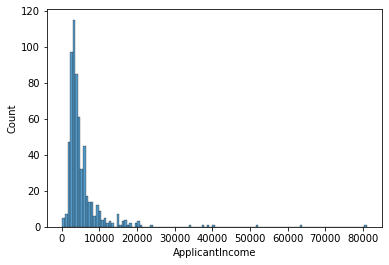

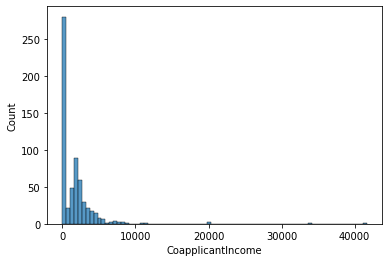

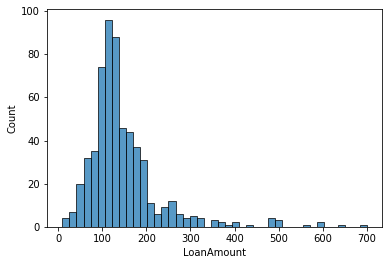

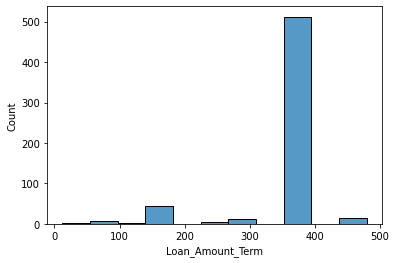

In [154]:
for feature in train.columns:
    if (train[feature].dtype!='O' and len(train[feature].unique())>10):
        sns.histplot(train[feature])
        plt.show()

In [155]:
# sns.heatmap(train[quant_features].corr(),annot=True)  

In [156]:
x=pd.pivot_table(train,index='Loan_Status',values=quant_features)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
0,5446.078125,1877.807292,151.220994,344.064516
1,5384.068720,1504.516398,144.294404,341.072464


### feature engineering

In [157]:
Loan_Id=test['Loan_ID']

In [158]:
df=pd.concat([train,test],axis=0).reset_index(drop=True)
df.shape

(981, 13)

In [159]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [160]:
df_nan=make_dataframe_for_nan(df)
df_nan

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
1,Gender,24,2.446483,2.0
2,Married,3,0.305810,0.0
3,Dependents,25,2.548420,3.0
4,Self_Employed,55,5.606524,6.0
5,LoanAmount,27,2.752294,3.0
6,Loan_Amount_Term,20,2.038736,2.0
7,Credit_History,79,8.053007,8.0
8,Loan_Status,367,37.410805,37.0


In [161]:
high_nan_features=list_of_high_nan_features(df)
high_nan_features

there is no  high null feature in dataframe


[]

### visulization of that how many rows droppeed

In [162]:
df.shape

(981, 13)

In [163]:
df.dropna().shape

(480, 13)

In [164]:
non_null_rows_per=df.iloc[:,:12].dropna().shape[0]/len(df)*100
null_rows_per=100-non_null_rows_per
print(null_rows_per)

21.610601427115185


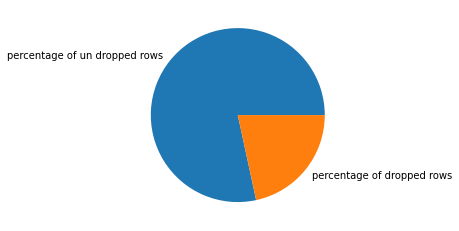

In [165]:
exp_vals=[non_null_rows_per,null_rows_per]
exp_labels=['percentage of un dropped rows','percentage of dropped rows']
plt.pie(exp_vals,labels=exp_labels)
plt.show()

### first way :drop all null values

In [166]:
# df=df.dropna()
# print('shape after dropping ',df.shape)

### 2nd:way fill with zero

In [167]:
df=df.fillna(0)

### 3rd way: fiill null_values with mode of that feature

In [168]:
# for feature in df.columns:
#     if df[feature].isnull().sum()>0:
#         df[feature]=df[feature].fillna(df[feature].mode()[0])

### 4rd way

In [169]:
catag_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [170]:
df[catag_features].isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [171]:
# for feature in catag_features:
#     if df[feature].isnull().sum()>0:
#         df[feature]=df[feature].fillna(df[feature].mode()[0])

### 4th way

In [172]:
# do above manually for every feature

### 5th way

In [173]:
# df['LoanAmount'].mean()

In [174]:
# df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [175]:
# df['Loan_Amount_Term'].mean()

In [176]:
# df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

### 6th way:

In [177]:
df['LoanAmount'].median()

125.0

In [178]:
df['Loan_Amount_Term'].median()

360.0

In [179]:
# df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [180]:
# df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

### 7th way:complex fill

In [181]:
# for feature in catag_features:
#     sns.boxplot(x=feature,y='LoanAmount',data=df)
#     plt.show()  

In [182]:
### un_completed

In [183]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### gender

In [184]:
# df=pd.get_dummies(df, columns = ["Gender"],drop_first=True, prefix="G")

In [185]:
# df=pd.get_dummies(df, columns = ["Married"],drop_first=True, prefix="M")

In [186]:
# df=pd.get_dummies(df, columns = ['Dependents'],drop_first=True, prefix="Dep")

In [187]:
# df=pd.get_dummies(df, columns = ["Education"],drop_first=True, prefix="Edu")

In [188]:
# df=pd.get_dummies(df, columns = ["Self_Employed"],drop_first=True, prefix="S_emp")

In [189]:
# df=pd.get_dummies(df, columns = ["Property_Area"],drop_first=True, prefix="p_area")

In [190]:
df.drop(['Loan_ID'],axis=1,inplace = True)

In [191]:
df.shape

(981, 12)

In [192]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,0.0
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,0.0
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,0.0,Semiurban,0.0
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0.0


### checking for non_numerical features

In [193]:
non_num_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
non_num_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

#### spliting

In [194]:
train=df.iloc[:len(train)]

### relationship

In [195]:
c_matrix=train.corr()

In [196]:
c_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.432616
Loan_Amount_Term     0.007306
ApplicantIncome     -0.004710
LoanAmount          -0.010631
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

In [197]:
strong_relation_features=[]
for feature in c_matrix['Loan_Status'].sort_values(ascending=False).keys():
    if c_matrix['Loan_Status'][feature]>=0.04 or c_matrix['Loan_Status'][feature]<=-0.04:
        strong_relation_features.append(feature) 

In [198]:
strong_relation_features.remove('Loan_Status')

In [199]:
strong_relation_features

['Credit_History', 'CoapplicantIncome']

In [200]:
df_strong=df[strong_relation_features]

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
# for feature in strong_relation_features:
#     sns.relplot(x=feature,y="Loan_Status",data=df,kind='line')

### feature selection

In [203]:
y=train['Loan_Status']

In [204]:
X=train[strong_relation_features]


In [205]:
num_features=[feature for feature in train.columns if train[feature].dtype!='O']
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

In [206]:
num_features[:5]

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [207]:
X=train[num_features[:5]]

In [208]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [209]:
selection.feature_importances_

array([0.29786988, 0.16250048, 0.28685312, 0.06561966, 0.18715687])

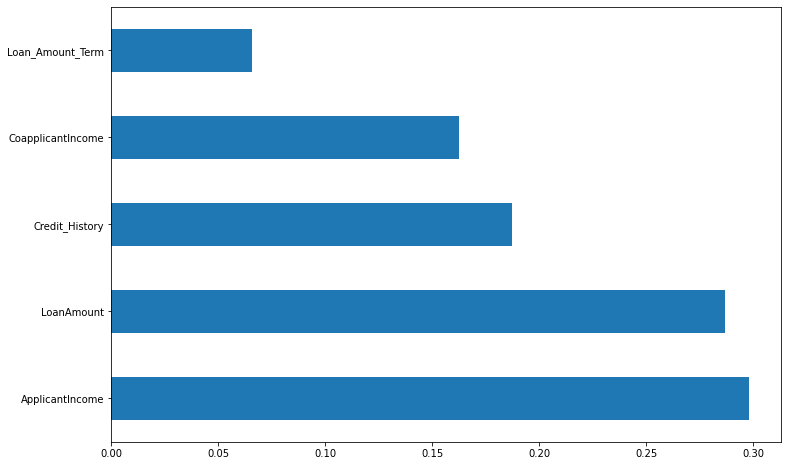

In [210]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [211]:
largest_imp_5=list(feat_importances.nlargest(5).keys())
largest_imp_5

['ApplicantIncome',
 'LoanAmount',
 'Credit_History',
 'CoapplicantIncome',
 'Loan_Amount_Term']

In [212]:
# X=train[largest_imp_5]

In [213]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [214]:
len(X.columns)

5

### cross validation method to check accuracy of all models

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.646642,0.763855,0.734426,0.685669


### split data into train and test part to make prediction

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### creating model

In [218]:
# As Random Forest and logistic regression perform at high accuracy so i choose one of them

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# from sklearn.svm import SVC
# model = SVC()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


### fitting data

In [219]:
model.fit(X_train,y_train)

RandomForestClassifier()

### saving model

In [220]:
# import pickle
# pickle.dump(model, open('model_Loan_eligibility_predictions.pkl','wb'))

### percentage of accuracy

In [221]:
model.score(X_test,y_test)

0.7154471544715447

In [222]:
model.predict(X_test[:5])

array([1., 0., 1., 1., 1.])

In [223]:
X_test[:5]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
350,9083,0.0,228.0,360.0,1.0
377,4310,0.0,130.0,360.0,0.0
163,4167,1447.0,158.0,360.0,1.0
609,2900,0.0,71.0,360.0,1.0
132,2718,0.0,70.0,360.0,1.0


### Accuracy VS Precision VS Recall VS f1_score

In [224]:
from sklearn import metrics
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.7154471544715447
Precision: 0.7586206896551724
Recall: 0.825
F1_score: 0.7904191616766467


### confusion matrix

In [225]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[22 21]
 [14 66]]


### confusion matrix heatmap

Text(69.0, 0.5, 'Truth')

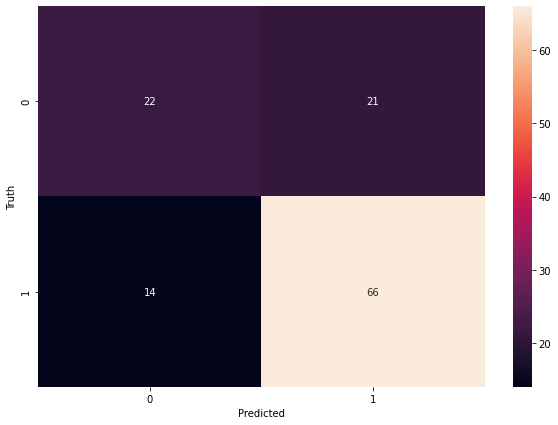

In [226]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### classification report

In [227]:
from sklearn.metrics import classification_report

In [228]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.61      0.51      0.56        43
         1.0       0.76      0.82      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.71      0.72      0.71       123

